In [1]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is CE76-0618

 Directory of D:\Downloads\forest-fires-in-brazil

14-12-2019  16:56    <DIR>          .
14-12-2019  16:56    <DIR>          ..
14-12-2019  13:31    <DIR>          .ipynb_checkpoints
14-12-2019  15:06           262,491 amazon.csv
14-12-2019  16:56           160,388 Forest in brazil.ipynb
               2 File(s)        422,879 bytes
               3 Dir(s)  34,774,134,784 bytes free


In [2]:
#reading data
import pandas as pd

In [3]:
data = pd.read_csv("amazon.csv", thousands = '.',encoding = 'utf8')
#The thousands = "." parameter makes up for the decimal formatting.

In [4]:
#checking column data types

In [5]:
data.apply(lambda x: pd.api.types.infer_dtype(x.values))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\apply.py:251: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  labels=labels)


year      integer
state      string
month      string
number    integer
date       string
dtype: object

In [6]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [7]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


In [8]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [9]:
data.describe(include= "all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2001-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [10]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
#good to go
import numpy as np

In [12]:
data = data.replace(0,np.nan)

In [13]:
data2 = data.dropna(subset = ['number'])

In [14]:
data2.describe()

,year,number
count,5837.000000,5837.000000
mean,2007.834847,577.947918
std,5.649076,1625.176973
min,1998.000000,1.000000
25%,2003.000000,16.000000
50%,2008.000000,72.000000
75%,2013.000000,334.000000
max,2017.000000,25963.000000


In [15]:
data2.describe(include = 'all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [20]:
forest_fire_per_month = data2.groupby('month')['number'].sum()

In [21]:
#print(forest_fire_per_month)

In [22]:
months_unique = list(data.month.unique())

In [23]:
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0) 

In [24]:
#we convert the series into a dataframe


In [25]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [26]:
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Mar�o,35118.0
Abril,28364.0
Maio,46083.0


In [27]:
!pip install googletrans

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Mar�o,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [29]:
%pip install googletrans

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
import googletrans
translator = googletrans.Translator()

In [31]:
for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print("...")

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
...
Detected(lang=en, confidence=0.0)
Translated(src=en, dest=en, text=Mar�o, pronunciation=Mar�o, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
...
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
...
Detected(lang=espt, confidence=0.379047)
Translated(src=es, dest=en, text=August, pronunciation

In [32]:
#returned Translator() object

In [33]:
translator2 = googletrans.Translator()
#cannot use the one defined before as that contains the latest #month’s calculated value
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)  
    month1 = translated.text    
    forest_fire_per_month.at[i, 'month'] = month1

In [34]:
print(forest_fire_per_month)

        month     number
0     Janeiro    52587.0
1    February    30952.0
2       Mar�o    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


In [35]:
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,February,30952.0
2,Mar�o,35118.0
3,April,28364.0
4,May,46083.0


In [36]:
import matplotlib.pyplot as plt

In [37]:
plt.figure(figsize=(25, 15))

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<BarContainer object of 12 artists>

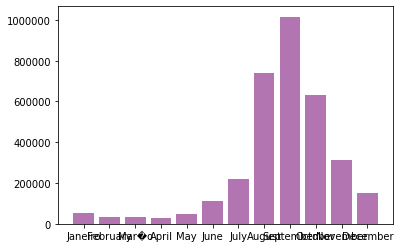

In [38]:
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'],
color = (0.5,0.1,0.5,0.6))

Text(0, 0.5, 'Number of Forest Fires')

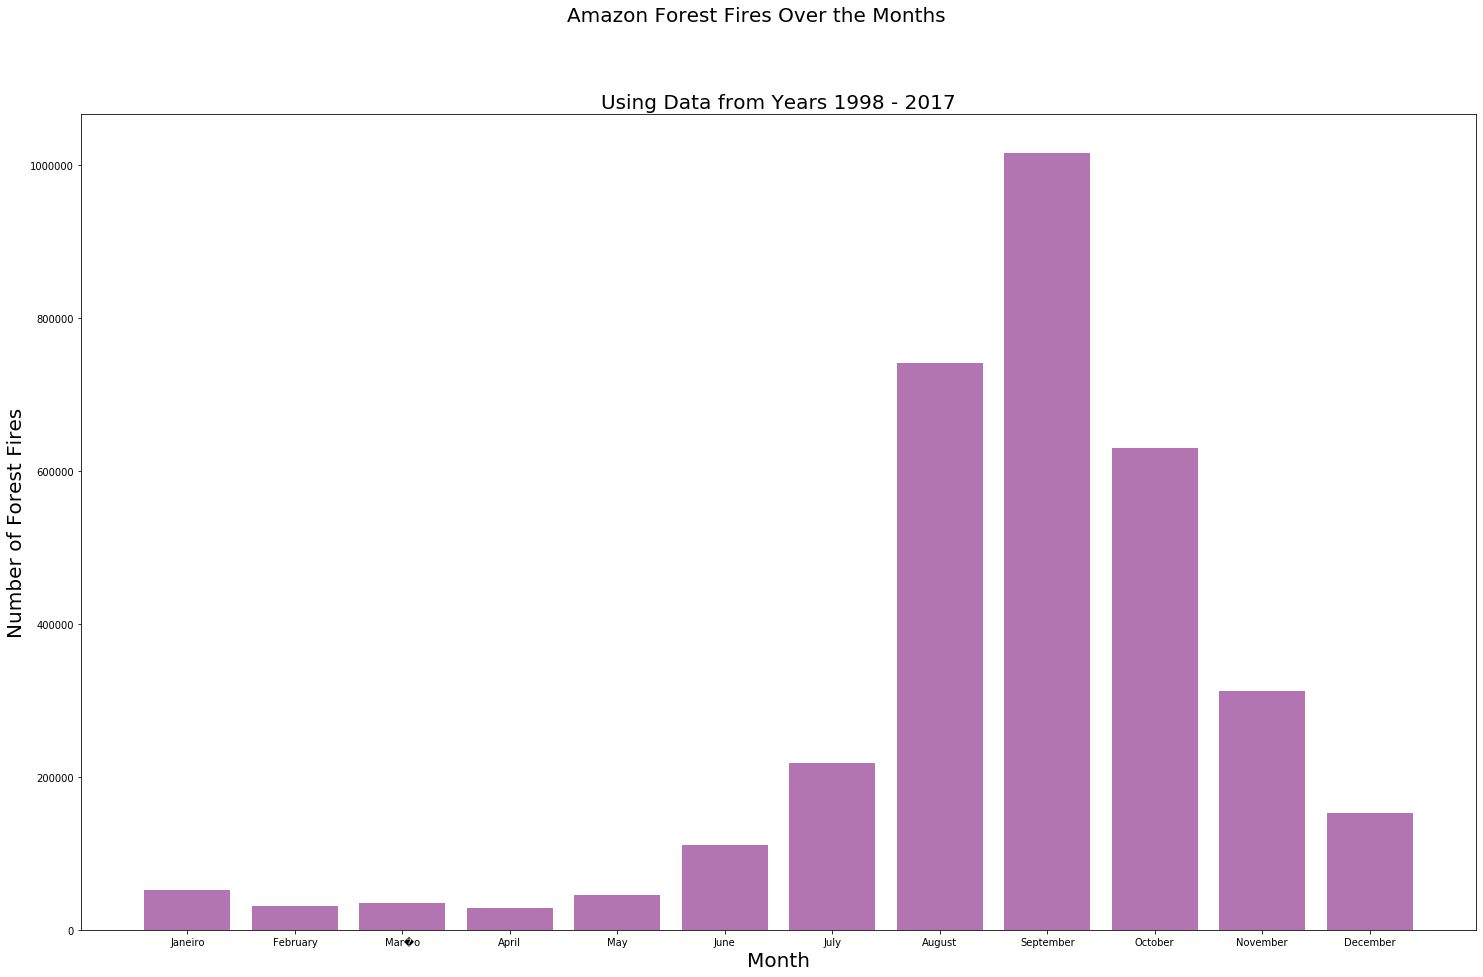

In [45]:
plt.figure(figsize=(25, 15)) 
#specify width and height 
#plt.bar(x-values, y-values) 
plt.bar(
    forest_fire_per_month['month'],
    forest_fire_per_month['number'],
    color = (0.5,0.1,0.5,0.6)) 
#use .suptitle for the actual title and .title for the subheading

plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)#this adds text at the top of each bar indicating its value
"""for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   
#plt.setp is to set a property on an artist object.
#plt.gca() gets the crent axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
#plt.setp(plt.gca().get_yticklabels(), fontsize=20)    
"""

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

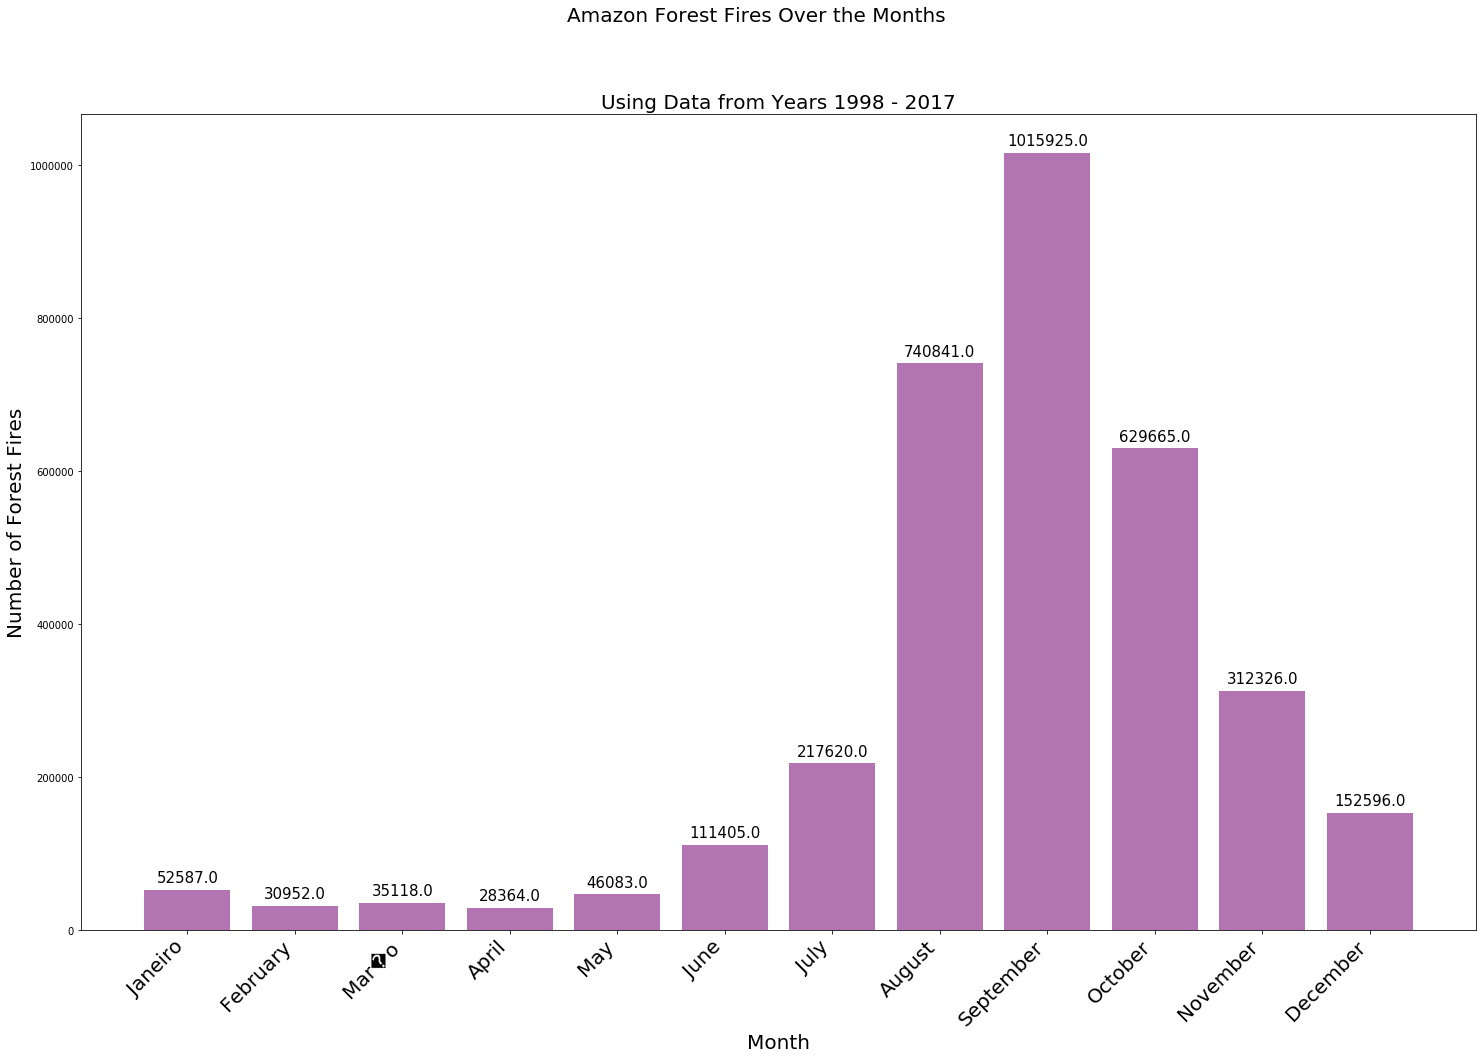

In [46]:
plt.figure(figsize=(25, 15)) 
#specify width and height 
#plt.bar(x-values, y-values) 
plt.bar(
    forest_fire_per_month['month'],
    forest_fire_per_month['number'],
    color = (0.5,0.1,0.5,0.6)) 
#use .suptitle for the actual title and .title for the subheading

plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   
#plt.setp is to set a property on an artist object.
#plt.gca() gets the crent axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
#plt.setp(plt.gca().get_yticklabels(), fontsize=20)   